In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [ ]:
# # Python 3 code to rename multiple
# # files in a directory or folder

# # importing os module
# import os

# # Function to rename multiple files
# def main():

# 	folder = "Soil types\Black Soil"
# 	for count, filename in enumerate(os.listdir(folder)):
# 		dst = f"Black_Soil_{str(count)}.jpg"
# 		src =f"{folder}/{filename}" # foldername/filename, if .py file is outside folder
# 		dst =f"{folder}/{dst}"

# 		# rename() function will
# 		# rename all the files
# 		os.rename(src, dst)

# # Driver Code
# if __name__ == '__main__':

# 	# Calling main() function
# 	main()


In [ ]:
import os
path,dir,files = next(os.walk('/content/drive/MyDrive/Soil types'))
file_count = len(files)
print("Number of images: ",file_count)

Number of images:  3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
import matplotlib.image as mpimg
import cv2

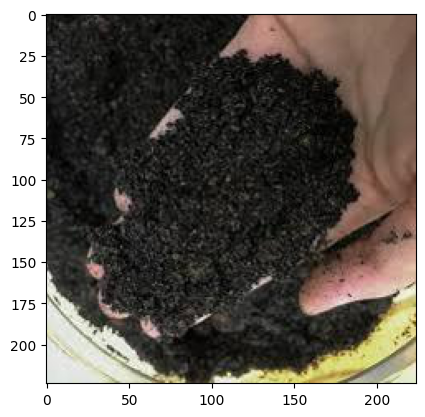

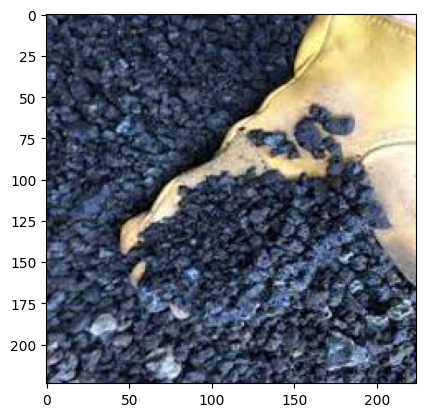

In [ ]:
img = mpimg.imread(r'/content/drive/MyDrive/Soil types/Black_Soil_ (24).jpg')
imgplot = plt.imshow(img)
plt.show()
cv2.imwrite('data/dst/opencv_vconcat.jpg', im_v)

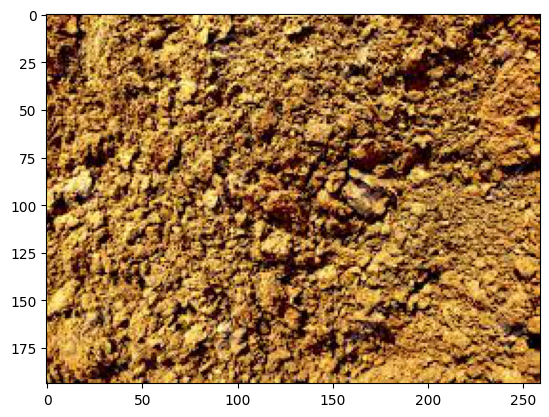

In [ ]:
img = mpimg.imread(r'/content/drive/MyDrive/Soil types/Yellow Soil/Yellow_Soil_ (13).jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
filenames = os.listdir('/content/drive/MyDrive/Soil types')

In [ ]:
black = []
cinder = []
laterite = []
peat = []
yellow = []
for files in filenames:
    if files[0:5] == 'Black':
        black.append(files)
    elif files[0:6] == 'Cinder':
        cinder.append(files)
    elif files[0:8] == 'Laterite':
        laterite.append(files)
    elif files[0:4] == 'Peat':
        peat.append(files)
    elif files[0:6] == 'Yellow':
        yellow.append(files)
print(len(black),len(cinder),len(laterite),len(peat),len(yellow))

1 1 1 1 1


In [ ]:
# os.mkdir('images_resized')
original_path = '/content/drive/MyDrive/Soil types'
new_path = 'images_resized/'

In [ ]:
# from PIL import Image
# import os, sys

# def resize_rename_rotate(srcdir,srcfile, targetdir="", size=(224,224)):

#   #srcfile_path : the complete path to source file
#   src_path = srcdir+srcfile

#   targetfile = os.path.splitext(srcfile)
#   extension = os.path.splitext(srcfile)[1]

#   if srcfile != targetfile:
#      try :
#          im = Image.open(src_path)  # open file
#          im = im.rotate(90) # degrees counter-clockwise
#          im = im.resize(size) # resize the file
#          im.save(targetdir+targetfile[0]+'__'+".jpg")
#      except IOError:
#          print ("cannot change image for ", srcfile)

# if __name__=="__main__":
#   targetdir = "images_reized1/"
#   srcdir = "images_resized/"

#   for file in os.listdir(srcdir):
#      resize_rename_rotate(srcdir,file,targetdir)

In [ ]:
# for i in range(len(filenames)):
#     filename = os.listdir(path)[i]
#     f_img = path+"/"+filename
#     img = Image.open(f_img)
#     img = img.resize((224, 224)) #(width, height)
#     img = img.convert('RGB')
#     new_img_path = new_path+'/'+filename
#     img.save(new_img_path)

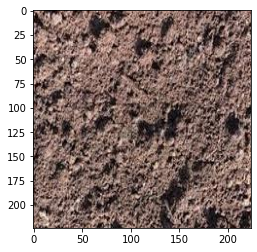

In [ ]:
img = mpimg.imread(r'images_resized\Black_Soil_ (1).jpg')
imgplot = plt.imshow(img)
plt.show()

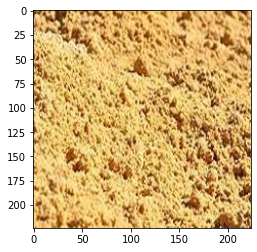

In [ ]:
img = mpimg.imread(r'images_resized\Yellow_Soil_ (1).jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
import glob

In [ ]:
image_directory = 'images_resized/'
image_extensions = ['png','jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extensions]
soil_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
soil_images.shape

(1248, 224, 224, 3)

In [ ]:
filenames = os.listdir('images_resized/')

In [ ]:
labels = []
for i in range(0,len(filenames)):
    files = filenames[i]
    if files[0:5] == 'Black':
        labels.append(0)
    elif files[0:6] == 'Cinder':
        labels.append(1)
    elif files[0:8] == 'Laterite':
        labels.append(2)
    elif files[0:4] == 'Peat':
        labels.append(3)
    elif files[0:6] == 'Yellow':
        labels.append(4)

In [ ]:
labels.count(0), labels.count(1),labels.count(2), labels.count(3),labels.count(4)

(296, 240, 240, 240, 232)

In [ ]:
X = soil_images
Y = np.asarray(labels)

In [ ]:
Y

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=35,stratify=Y)

In [ ]:
Y_train.shape,Y_test.shape

((998,), (250,))

In [ ]:
X_train_scaled = X_train/255

In [ ]:
X_test_scaled = X_test/255

In [ ]:
import tensorflow_hub as hub

In [ ]:
mobile_net_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobile_net_model,input_shape=(224,224,3),trainable=False)

In [ ]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [ ]:
number_of_classes = 5

model = Sequential()

model.add(pretrained_model)

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))

model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 flatten_6 (Flatten)         (None, 1280)              0         
                                                                 
 dense_22 (Dense)            (None, 1024)              1311744   
                                                                 
 dense_23 (Dense)            (None, 512)               524800    
                                                                 
 dense_24 (Dense)            (None, 256)               131328    
                                                                 
 dense_25 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 4,227,141
Trainable params: 1,969,157
No

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
history = model.fit(X_train_scaled,Y_train,epochs=20,validation_split=0.25,batch_size=16)

Epoch 1/20


c:\Python\Python395\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


47/47 [==============================] - 11s 110ms/step - loss: 0.8020 - acc: 0.7086 - val_loss: 0.2657 - val_acc: 0.8960
Epoch 2/20
47/47 [==============================] - 3s 71ms/step - loss: 0.2165 - acc: 0.9184 - val_loss: 0.1721 - val_acc: 0.9320
Epoch 3/20
47/47 [==============================] - 3s 65ms/step - loss: 0.0997 - acc: 0.9626 - val_loss: 0.1807 - val_acc: 0.9440
Epoch 4/20
47/47 [==============================] - 3s 55ms/step - loss: 0.0266 - acc: 0.9893 - val_loss: 0.1650 - val_acc: 0.9520
Epoch 5/20
47/47 [==============================] - 3s 55ms/step - loss: 0.1079 - acc: 0.9733 - val_loss: 0.2011 - val_acc: 0.9320
Epoch 6/20
47/47 [==============================] - 3s 55ms/step - loss: 0.0539 - acc: 0.9773 - val_loss: 0.2096 - val_acc: 0.9320
Epoch 7/20
47/47 [==============================] - 3s 55ms/step - loss: 0.0367 - acc: 0.9853 - val_loss: 0.2780 - val_acc: 0.9200
Epoch 8/20
47/47 [==============================] - 3s 56ms/step - loss: 0.0871 - acc: 0.978

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(history.history['val_acc'],linewidth = 4)
plt.plot(history.history['acc'],linewidth = 4)

plt.title("Training and Validation Accuracy",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['val','train'],loc = 'lower right')
plt.grid()
plt.show()

NameError: ignored

<Figure size 700x500 with 0 Axes>

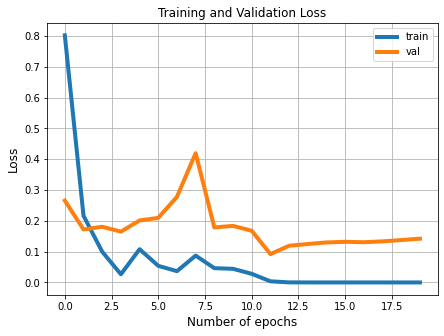

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],linewidth = 4)
plt.plot(history.history['val_loss'],linewidth = 4)

plt.title("Training and Validation Loss",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['train','val'],loc = 'upper right')
plt.grid()
plt.show()


In [ ]:
score,acc = model.evaluate(X_test_scaled,Y_test)
print("Test Loss = ",score)
print("Test Acc = ",acc)

8/8 [==============================] - 1s 74ms/step - loss: 0.0693 - acc: 0.9800
Test Loss =  0.06929057836532593
Test Acc =  0.9800000190734863


0
Black Soil


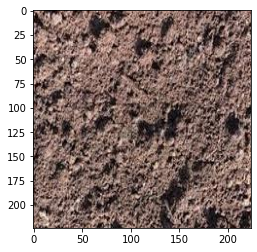

In [ ]:
img_test = cv2.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\images_resized\Black_Soil_ (1).jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\images_resized\Black_Soil_ (1).jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Black Soil")
elif input_label == 1:
    print("Cinder Soil")
elif input_label == 2:
    print("Laterite Soil")
elif input_label == 3:
    print("Peat Soil")
elif input_label == 4:
    print("Yellow Soil")

4
Yellow Soil


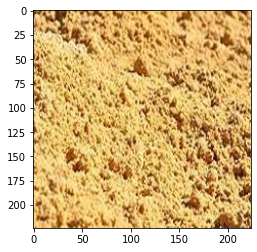

In [ ]:
img_test = cv2.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\images_resized\Yellow_Soil_ (1).jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\images_resized\Yellow_Soil_ (1).jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Black Soil")
elif input_label == 1:
    print("Cinder Soil")
elif input_label == 2:
    print("Laterite Soil")
elif input_label == 3:
    print("Peat Soil")
elif input_label == 4:
    print("Yellow Soil")

0
Black Soil


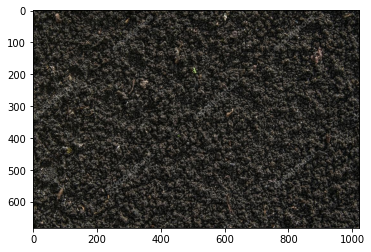

In [ ]:
img_test = cv2.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\test\black soil.jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\test\black soil.jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Black Soil")
elif input_label == 1:
    print("Cinder Soil")
elif input_label == 2:
    print("Laterite Soil")
elif input_label == 3:
    print("Peat Soil")
elif input_label == 4:
    print("Yellow Soil")

4
Yellow Soil


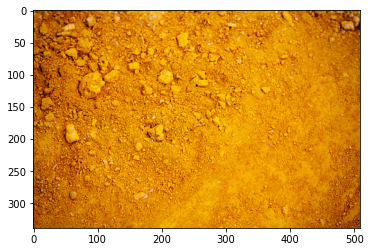

In [ ]:
img_test = cv2.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\test\yellow soil.jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\test\yellow soil.jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Black Soil")
elif input_label == 1:
    print("Cinder Soil")
elif input_label == 2:
    print("Laterite Soil")
elif input_label == 3:
    print("Peat Soil")
elif input_label == 4:
    print("Yellow Soil")

3
Peat Soil


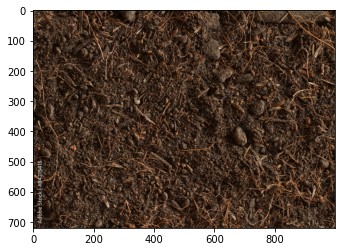

In [ ]:
img_test = cv2.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\test\peat soil.jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'D:\Machine Learning Projects\Soil-Type-Classification\test\peat soil.jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Black Soil")
elif input_label == 1:
    print("Cinder Soil")
elif input_label == 2:
    print("Laterite Soil")
elif input_label == 3:
    print("Peat Soil")
elif input_label == 4:
    print("Yellow Soil")

In [ ]:
# model.save('my_model.h5')